In [ ]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from datetime import datetime
from sklearn.preprocessing import StandardScaler

In [ ]:
delhi_aqi_file = pd.read_csv('/content/drive/MyDrive/Updated_Dataset_with_AQI (1).csv',index_col=0,parse_dates=['date'])
delhi_aqi_file.describe()

,date,pm25,pm10,o3,no2,so2,co,year,month,PM2.5_AQI,PM10_AQI,NO2_AQI,CO_AQI,O3_AQI,AQI
count,2541,2512.000000,2491.000000,2486.000000,2479.000000,2443.000000,2480.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000
mean,2021-07-19 02:30:44.628099072,187.619427,186.114412,16.835076,19.020976,5.916496,12.784677,2021.049980,6.493900,225.783548,245.606730,69.932188,18.097000,69.057139,292.879196
min,2018-01-18 00:00:00,26.000000,15.000000,1.000000,1.000000,1.000000,1.000000,2018.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019-10-16 00:00:00,130.000000,102.000000,6.000000,10.000000,2.000000,8.000000,2019.000000,3.000000,187.870390,189.000000,62.679245,10.979592,60.444444,223.661749
50%,2021-07-19 00:00:00,164.000000,146.000000,13.000000,16.000000,5.000000,11.000000,2021.000000,7.000000,237.346681,234.000000,67.886792,13.000000,66.796296,271.762763
75%,2023-04-15 00:00:00,223.000000,231.000000,24.000000,24.000000,9.000000,16.000000,2023.000000,10.000000,304.282282,307.000000,74.830189,28.344828,76.777778,359.181818
max,2025-02-02 00:00:00,828.000000,979.000000,108.000000,98.000000,40.000000,75.000000,2025.000000,12.000000,499.399399,606.594203,348.739130,49.865772,211.030303,606.594203
std,NaN,85.558149,121.448428,14.118048,12.561405,4.768729,7.823667,2.023158,3.476533,134.429674,111.932029,21.696898,11.814251,17.530591,102.082280


# ***Data cleaning and Data processing***

**Viewing the first five rows**

In [ ]:
delhi_aqi_file.head()

,date,pm25,pm10,o3,no2,so2,co,Date,year,month,PM2.5_AQI,PM10_AQI,NO2_AQI,CO_AQI,O3_AQI,AQI
Unnamed: 0,,,,,,,,,,,,,,,,
0,2024-10-01,153.0,151.0,30.0,22.0,1.0,14.0,2024-10-01,2024,10,256.753754,251.0,73.094340,23.206897,82.222222,256.753754
1,2024-10-02,160.0,161.0,35.0,22.0,3.0,13.0,2024-10-02,2024,10,274.264264,261.0,73.094340,18.068966,86.759259,274.264264
2,2024-10-03,198.0,158.0,31.0,20.0,3.0,13.0,2024-10-03,2024,10,369.321321,258.0,71.358491,18.068966,83.129630,369.321321
3,2024-10-04,141.0,129.0,32.0,17.0,2.0,11.0,2024-10-04,2024,10,240.504742,229.0,68.754717,14.000000,84.037037,240.504742
4,2024-10-05,112.0,127.0,28.0,14.0,3.0,8.0,2024-10-05,2024,10,209.976818,227.0,66.150943,11.571429,80.407407,227.000000


**Viewing the last five rows**

In [ ]:
delhi_aqi_file.tail()

,date,pm25,pm10,o3,no2,so2,co,Date,year,month,PM2.5_AQI,PM10_AQI,NO2_AQI,CO_AQI,O3_AQI,AQI
Unnamed: 0,,,,,,,,,,,,,,,,
2536,2024-09-20,NaN,183.0,27.0,45.0,2.0,22.0,2024-09-20,2024,9,0.0,283.0,93.056604,39.181208,79.500000,283.0
2537,2020-09-01,NaN,59.0,6.0,16.0,12.0,10.0,2020-09-01,2020,9,0.0,159.0,67.886792,13.000000,60.444444,159.0
2538,2020-09-06,NaN,91.0,7.0,22.0,10.0,NaN,2020-09-06,2020,9,0.0,191.0,73.094340,0.000000,61.351852,191.0
2539,2019-09-15,NaN,158.0,13.0,25.0,4.0,10.0,2019-09-15,2019,9,0.0,258.0,75.698113,13.000000,66.796296,258.0
2540,2019-09-21,NaN,122.0,14.0,17.0,6.0,7.0,2019-09-21,2019,9,0.0,222.0,68.754717,10.979592,67.703704,222.0


**calculating the size of the dataframe**

In [ ]:
delhi_aqi_file.shape

(2541, 16)

Removing the extra date column

In [ ]:
delhi_aqi_file = delhi_aqi_file.iloc[ : , :-9]

In [ ]:
delhi_aqi_file.head()

,date,pm25,pm10,o3,no2,so2,co
Unnamed: 0,,,,,,,
0,2024-10-01,153.0,151.0,30.0,22.0,1.0,14.0
1,2024-10-02,160.0,161.0,35.0,22.0,3.0,13.0
2,2024-10-03,198.0,158.0,31.0,20.0,3.0,13.0
3,2024-10-04,141.0,129.0,32.0,17.0,2.0,11.0
4,2024-10-05,112.0,127.0,28.0,14.0,3.0,8.0


**Viewing the columns**

In [ ]:
delhi_aqi_file.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

Getting the information about the dataset

In [ ]:
delhi_aqi_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2541 entries, 0 to 2540
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2541 non-null   datetime64[ns]
 1   pm25    2512 non-null   float64       
 2   pm10    2491 non-null   float64       
 3   o3      2486 non-null   float64       
 4   no2     2479 non-null   float64       
 5   so2     2443 non-null   float64       
 6   co      2480 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 158.8 KB


Checking the missing values in the dataframe.

In [ ]:
delhi_aqi_file.isnull().sum()

,0
date,0
pm25,29
pm10,50
o3,55
no2,62
so2,98
co,61


There are some missing values in our dataframe which are represented as empty space/" ". We will find the count of these such values.

In [ ]:
delhi_aqi_file.isin([" "]).sum(axis=0)

,0
date,0
pm25,0
pm10,0
o3,0
no2,0
so2,0
co,0


**Handling the missing values**

Covert all empty spaces with NaN

and then insert the mean of that particular column to thos NaN values

In [ ]:
delhi_aqi_file = delhi_aqi_file.replace(to_replace = " ",value = np.nan)

In [ ]:
delhi_aqi_file.isnull().sum()

,0
date,0
pm25,29
pm10,50
o3,55
no2,62
so2,98
co,61


This shows the actual number of missing values as python only understand NaN values as missing values.

In [ ]:
delhi_aqi_file.tail()

,date,pm25,pm10,o3,no2,so2,co
Unnamed: 0,,,,,,,
2536,2024-09-20,NaN,183.0,27.0,45.0,2.0,22.0
2537,2020-09-01,NaN,59.0,6.0,16.0,12.0,10.0
2538,2020-09-06,NaN,91.0,7.0,22.0,10.0,NaN
2539,2019-09-15,NaN,158.0,13.0,25.0,4.0,10.0
2540,2019-09-21,NaN,122.0,14.0,17.0,6.0,7.0


From above we can see that every empty space value has been replaced by the NaN values. Now we will remove the mean

In [ ]:
delhi_aqi_file.iloc[:,1:] = delhi_aqi_file.iloc[:,1:].apply(pd.to_numeric)
delhi_aqi_file.head()

,date,pm25,pm10,o3,no2,so2,co
Unnamed: 0,,,,,,,
0,2024-10-01,153.0,151.0,30.0,22.0,1.0,14.0
1,2024-10-02,160.0,161.0,35.0,22.0,3.0,13.0
2,2024-10-03,198.0,158.0,31.0,20.0,3.0,13.0
3,2024-10-04,141.0,129.0,32.0,17.0,2.0,11.0
4,2024-10-05,112.0,127.0,28.0,14.0,3.0,8.0


In [ ]:
delhi_aqi_file.tail()

,date,pm25,pm10,o3,no2,so2,co
Unnamed: 0,,,,,,,
2536,2024-09-20,NaN,183.0,27.0,45.0,2.0,22.0
2537,2020-09-01,NaN,59.0,6.0,16.0,12.0,10.0
2538,2020-09-06,NaN,91.0,7.0,22.0,10.0,NaN
2539,2019-09-15,NaN,158.0,13.0,25.0,4.0,10.0
2540,2019-09-21,NaN,122.0,14.0,17.0,6.0,7.0


Calculating the mean of the dataframe and escaping the first column of the dataset as it is not an Integer value rather it is an string value.

In [ ]:
delhi_aqi_file.iloc[:,1:].mean()

,0
pm25,187.619427
pm10,186.114412
o3,16.835076
no2,19.020976
so2,5.916496
co,12.784677


Replacing the missing values with mean values

In [ ]:
delhi_aqi_file = delhi_aqi_file.fillna(delhi_aqi_file.iloc[:,1:].mean())

In [ ]:
delhi_aqi_file.tail()

,date,pm25,pm10,o3,no2,so2,co
Unnamed: 0,,,,,,,
2536,2024-09-20,187.619427,183.0,27.0,45.0,2.0,22.000000
2537,2020-09-01,187.619427,59.0,6.0,16.0,12.0,10.000000
2538,2020-09-06,187.619427,91.0,7.0,22.0,10.0,12.784677
2539,2019-09-15,187.619427,158.0,13.0,25.0,4.0,10.000000
2540,2019-09-21,187.619427,122.0,14.0,17.0,6.0,7.000000


In [ ]:
delhi_aqi_file.isnull().sum()

,0
date,0
pm25,0
pm10,0
o3,0
no2,0
so2,0
co,0


In [ ]:
#delhi_aqi_file = pd.concat([delhi_aqi_file.iloc[[-1]],delhi_aqi_file.iloc[:-1]]).reset_index(drop=True)

In [ ]:
delhi_aqi_file.head()

,date,pm25,pm10,o3,no2,so2,co
Unnamed: 0,,,,,,,
0,2024-10-01,153.0,151.0,30.0,22.0,1.0,14.0
1,2024-10-02,160.0,161.0,35.0,22.0,3.0,13.0
2,2024-10-03,198.0,158.0,31.0,20.0,3.0,13.0
3,2024-10-04,141.0,129.0,32.0,17.0,2.0,11.0
4,2024-10-05,112.0,127.0,28.0,14.0,3.0,8.0


In [ ]:
delhi_aqi_file.tail()

,date,pm25,pm10,o3,no2,so2,co
Unnamed: 0,,,,,,,
2536,2024-09-20,187.619427,183.0,27.0,45.0,2.0,22.000000
2537,2020-09-01,187.619427,59.0,6.0,16.0,12.0,10.000000
2538,2020-09-06,187.619427,91.0,7.0,22.0,10.0,12.784677
2539,2019-09-15,187.619427,158.0,13.0,25.0,4.0,10.000000
2540,2019-09-21,187.619427,122.0,14.0,17.0,6.0,7.000000


Two tasks can be performed on this dataset
1.Forecasting
2.Regression

# ***Performing XGBoost Model***

In [ ]:
delhi_aqi_file.set_index('date',inplace=True)

In [ ]:
delhi_aqi_file.head()

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2024-10-01,153.0,151.0,30.0,22.0,1.0,14.0
2024-10-02,160.0,161.0,35.0,22.0,3.0,13.0
2024-10-03,198.0,158.0,31.0,20.0,3.0,13.0
2024-10-04,141.0,129.0,32.0,17.0,2.0,11.0
2024-10-05,112.0,127.0,28.0,14.0,3.0,8.0


In [ ]:
delhi_aqi_file['AQI'] = delhi_aqi_file[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].max(axis=1)

In [ ]:
delhi_aqi_file.head()

,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2024-10-01,153.0,151.0,30.0,22.0,1.0,14.0,153.0
2024-10-02,160.0,161.0,35.0,22.0,3.0,13.0,161.0
2024-10-03,198.0,158.0,31.0,20.0,3.0,13.0,198.0
2024-10-04,141.0,129.0,32.0,17.0,2.0,11.0,141.0
2024-10-05,112.0,127.0,28.0,14.0,3.0,8.0,127.0


In [ ]:
delhi_aqi_file.tail()

,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2024-09-20,187.619427,183.0,27.0,45.0,2.0,22.000000,187.619427
2020-09-01,187.619427,59.0,6.0,16.0,12.0,10.000000,187.619427
2020-09-06,187.619427,91.0,7.0,22.0,10.0,12.784677,187.619427
2019-09-15,187.619427,158.0,13.0,25.0,4.0,10.000000,187.619427
2019-09-21,187.619427,122.0,14.0,17.0,6.0,7.000000,187.619427


In [ ]:
# Define lag window (e.g., 3 days)
LAG_WINDOW = 7

# Create lagged features for all pollutants
for col in ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']:
    for lag in range(1, LAG_WINDOW + 1):
        delhi_aqi_file[f'{col}_lag{lag}'] = delhi_aqi_file[col].shift(lag)

In [ ]:
delhi_aqi_file.tail()

,pm25,pm10,o3,no2,so2,co,AQI,pm25_lag1,pm25_lag2,pm25_lag3,...,so2_lag5,so2_lag6,so2_lag7,co_lag1,co_lag2,co_lag3,co_lag4,co_lag5,co_lag6,co_lag7
date,,,,,,,,,,,,,,,,,,,,,
2024-09-20,187.619427,183.0,27.0,45.0,2.0,22.000000,187.619427,142.000000,172.000000,170.000000,...,12.0,11.0,11.0,11.000000,9.000000,13.0,21.0,14.0,10.0,8.0
2020-09-01,187.619427,59.0,6.0,16.0,12.0,10.000000,187.619427,187.619427,142.000000,172.000000,...,12.0,12.0,11.0,22.000000,11.000000,9.0,13.0,21.0,14.0,10.0
2020-09-06,187.619427,91.0,7.0,22.0,10.0,12.784677,187.619427,187.619427,187.619427,142.000000,...,12.0,12.0,12.0,10.000000,22.000000,11.0,9.0,13.0,21.0,14.0
2019-09-15,187.619427,158.0,13.0,25.0,4.0,10.000000,187.619427,187.619427,187.619427,187.619427,...,12.0,12.0,12.0,12.784677,10.000000,22.0,11.0,9.0,13.0,21.0
2019-09-21,187.619427,122.0,14.0,17.0,6.0,7.000000,187.619427,187.619427,187.619427,187.619427,...,13.0,12.0,12.0,10.000000,12.784677,10.0,22.0,11.0,9.0,13.0


In [ ]:
# Drop rows with NaN (from lagging)
df = delhi_aqi_file.dropna()

# Define features (X) and target (y)
X = delhi_aqi_file.drop('AQI', axis=1)
y = delhi_aqi_file['AQI']

Train test split

In [ ]:
# Use the last 20% of data for testing
split_idx = int(len(delhi_aqi_file) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

Train XGBoost Model

In [ ]:
# Initialize and train model
model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

Evaluate Performance

In [ ]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 4.20
MAE: 2.24
R² Score: 0.99


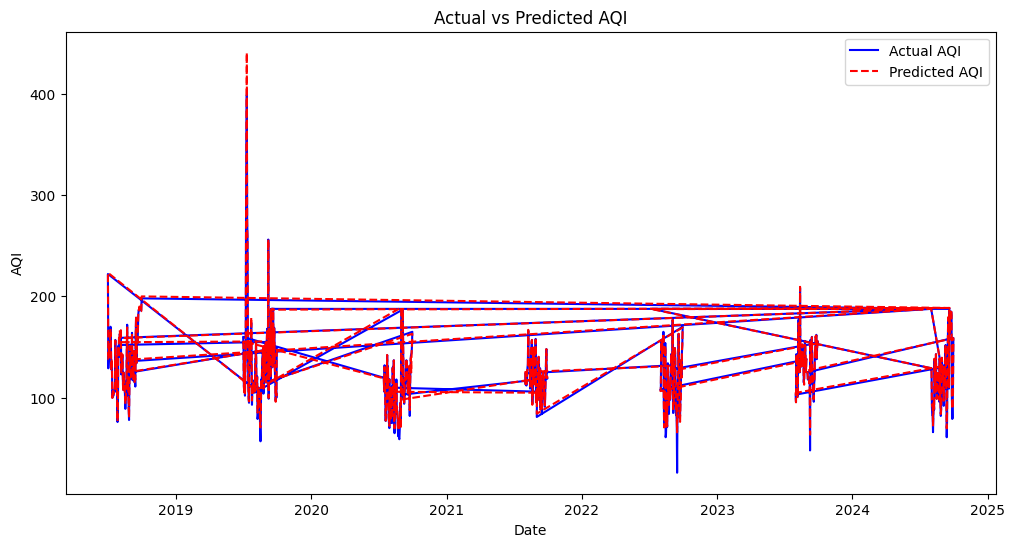

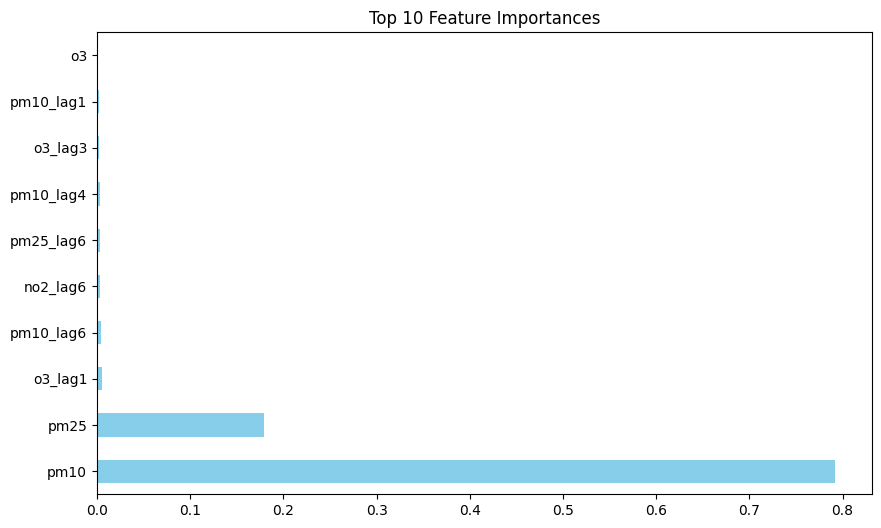

In [ ]:
# Plot actual vs predicted AQI
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual AQI', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted AQI', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Actual vs Predicted AQI')
plt.legend()
plt.show()

# Feature importance plot
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Feature Importances')
plt.show()

In [ ]:
predicted_values = pd.Series(y_pred, index=y_test.index, name='Predicted AQI')

In [ ]:
predicted_values

,Predicted AQI
date,
2020-07-15,118.766212
2020-07-16,106.747375
2020-07-17,130.253143
2020-07-18,118.330818
2020-07-19,92.363701
...,...
2024-09-20,188.499023
2020-09-01,187.132690
2020-09-06,187.381226


In [ ]:
predicted_values.tail()

,Predicted AQI
date,
2024-09-20,188.499023
2020-09-01,187.132690
2020-09-06,187.381226
2019-09-15,186.806122
2019-09-21,187.972168
